# **Regression Analysis**

This notebook uses a **Real Estate Price Prediction** dataset with columns:
- **No**
- **X1 transaction date**
- **X2 house age**
- **X3 distance to the nearest MRT station**
- **X4 number of convenience stores**
- **X5 latitude**
- **X6 longitude**
- **Y house price of unit area**

We will perform **extensive data exploration, preprocessing, and advanced regression** to illustrate:
1. Data cleaning and transformation
2. Exploratory Data Analysis (EDA) (correlations, partial correlations, VIF, etc.)
3. Successive Orthogonalization (Gram–Schmidt) to address multicollinearity
4. Splitting into training, validation, and test sets
5. Building multiple polynomial regression models
6. **Manually implementing** performance metrics (MSE, RMSE, R², F-statistic)
7. Additional advanced topics:
   - Cook’s distance to identify outliers/influential points
   - Q–Q plots and normality tests of residuals (Shapiro–Wilk)
   - Partial F-tests to compare models of different complexity
   - Variance Inflation Factor (VIF)
   - Cochran’s theorem, variance of noise, ANOVA, etc.

Throughout, we will intersperse theoretical explanations and references for deeper study.

### **Let's begin!**

# **A)**

### import packages

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For splitting data, polynomial transformations, etc.
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
# from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

# For reproducibility
np.random.seed(42)

plt.rcParams["figure.figsize"] = (8,6)
sns.set_style("whitegrid")
print("Setup complete.")

Setup complete.


### Data Loading
The dataset has the following columns:
- **No** (index or ID)
- **X1 transaction date**
- **X2 house age**
- **X3 distance to the nearest MRT station**
- **X4 number of convenience stores**
- **X5 latitude**
- **X6 longitude**
- **Y house price of unit area**

We’ll load this file into a Pandas DataFrame.

In [2]:
# Load data
data_path = './real_estate.csv'  # Adjust if needed

# TODO: Load the CSV file into a DataFrame
df = pd.read_csv(data_path)
df


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
# TODO: Print the shape of the dataset
print(f"shape of the dataset is:\n{df.shape}\n")

# TODO: Print the column names
print("------------------------------------------------------")
print(f"Name of the Columns are: \n{df.columns.tolist()}")

# TODO: Display the first few rows of the dataset
print("\n------------------------------------------------------")
print("First few rows of the dataset")
display(df.head())

# TODO: Show summary statistics of the dataset
print("\n------------------------------------------------------")
print("Summary statistics of the dataset")
display(df.describe())

# TODO: Check and print the number of missing values for each column
print("------------------------------------------------------")
print(f"The Number of missing values for each column:\n{df.isnull().sum()}")

shape of the dataset is:
(414, 8)

------------------------------------------------------
Name of the Columns are: 
['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']

------------------------------------------------------
First few rows of the dataset


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1



------------------------------------------------------
Summary statistics of the dataset


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


------------------------------------------------------
The Number of missing values for each column:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


### Preprocessing
We will:
1. Drop or transform the **No** column if it’s just an index.
2. Handle missing values.
3. Possibly convert `X1 transaction date` to a numeric or cyclical feature.
4. Scale the numeric features.

Here, `Y` (house price of unit area) is our target. We assume all other numeric columns are features. We do a standardization for these features.

In [4]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
# TODO: Import necessary libraries


# 1. TODO: Drop the 'No' column if it exists
df = df.loc[:, df.columns != 'No']

# 2. TODO: Handle missing values
# Hint: Fill numeric columns with the mean and categorical columns with the mode
df.update(df.select_dtypes(include=[np.number]).fillna(df.mean()))
df.update(df.select_dtypes(exclude=[np.number]).apply(lambda col: col.fillna(col.mode()[0])))

# 3. TODO: Convert 'X1 transaction date' to numeric if needed
# Since 'X1 transaction date' is already numeric (float64), no conversion is needed.

# 4. TODO: Scale the features (excluding 'Y house price of unit area')
features = df.drop(columns=['Y house price of unit area'])
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# TODO: Separate the target variable 'Y house price of unit area' without scaling
y = df['Y house price of unit area']

# TODO: Print the shapes of X_scaled and y
print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)

X_scaled shape: (414, 6)
y shape: (414,)



### Pairplot / Histograms
We can start by quickly checking distributions using histograms or pairplots.

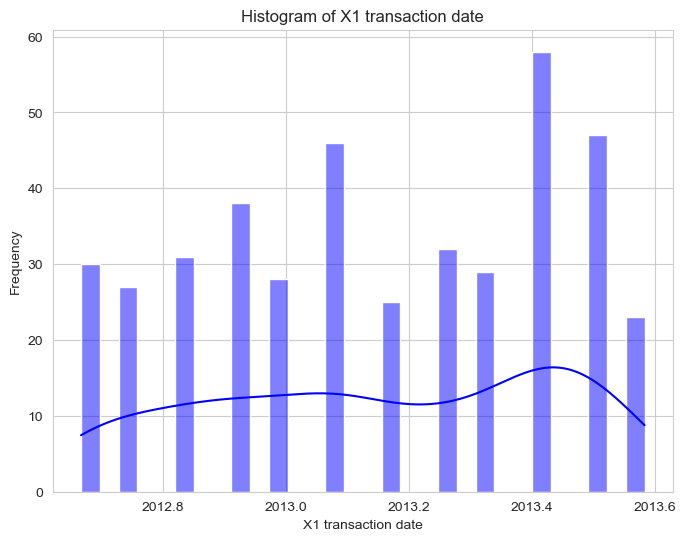

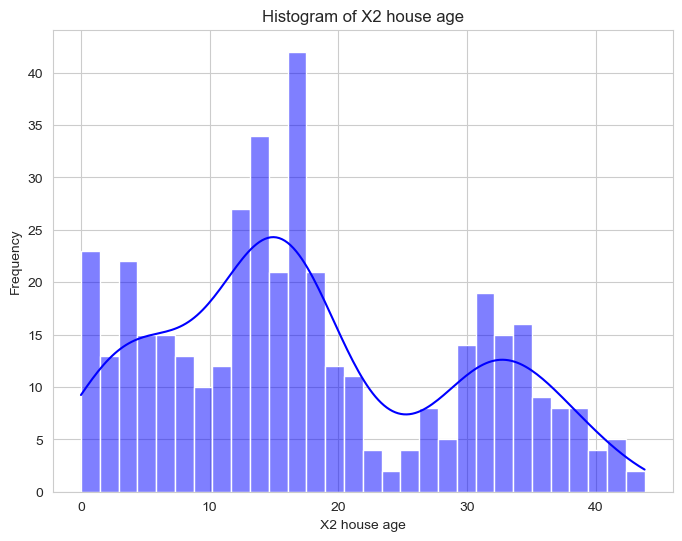

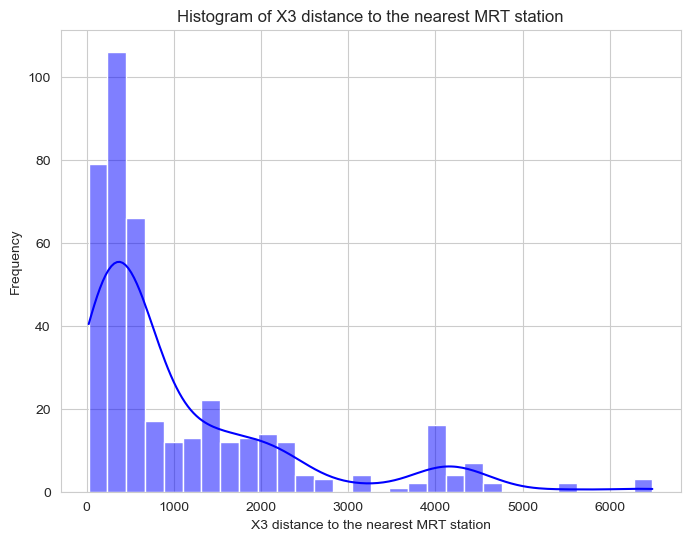

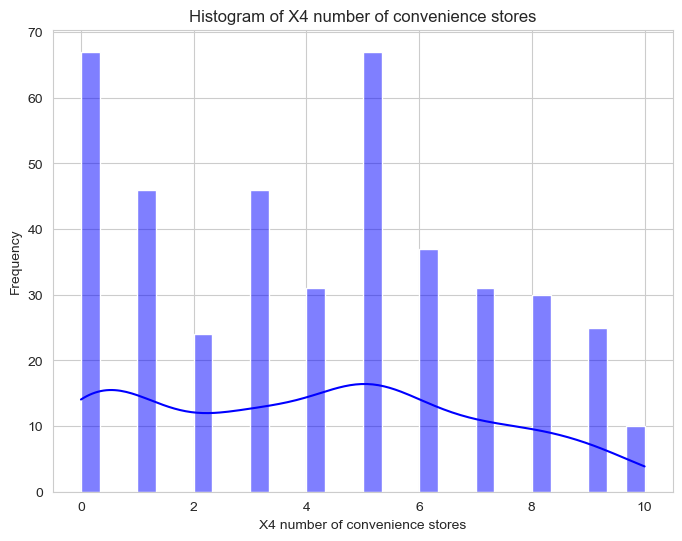

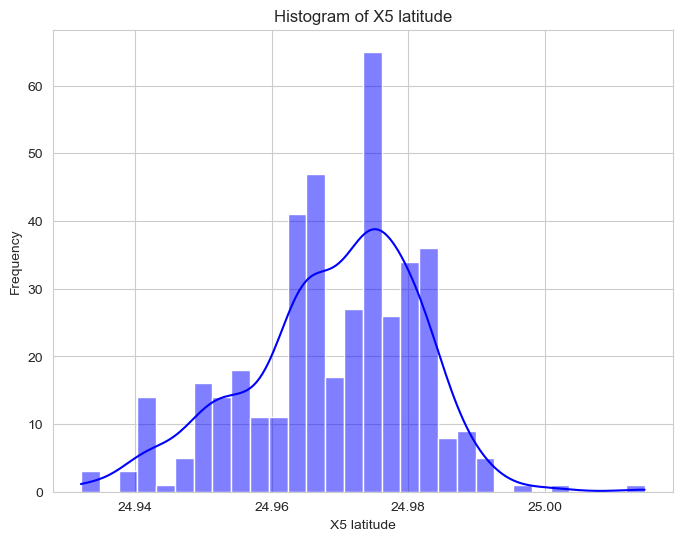

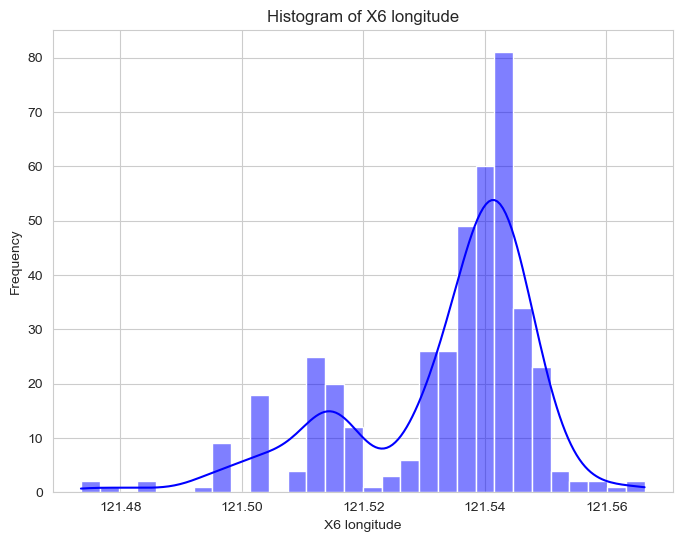

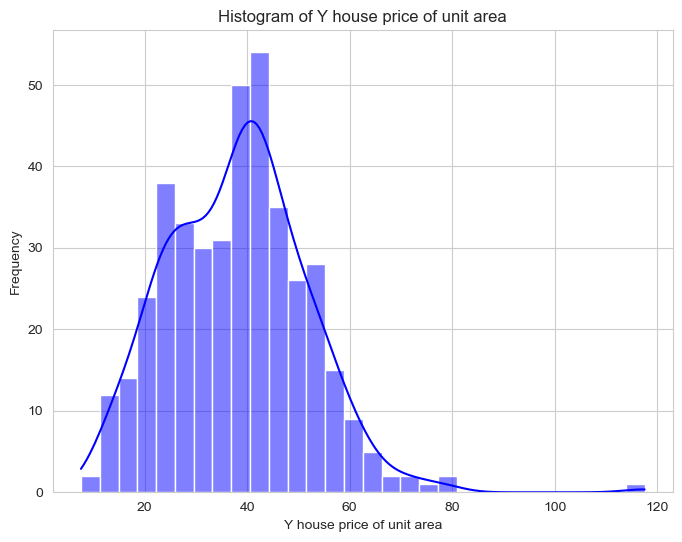

In [6]:
# TODO: Import necessary libraries


# TODO: Select numeric columns (excluding 'No')
numeric_columns = df.select_dtypes(include=[np.number]).drop(columns=['No'], errors='ignore').columns


# TODO: Create histograms for each numeric column
# TODO: Adjust layout and display the plots
for col in numeric_columns:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


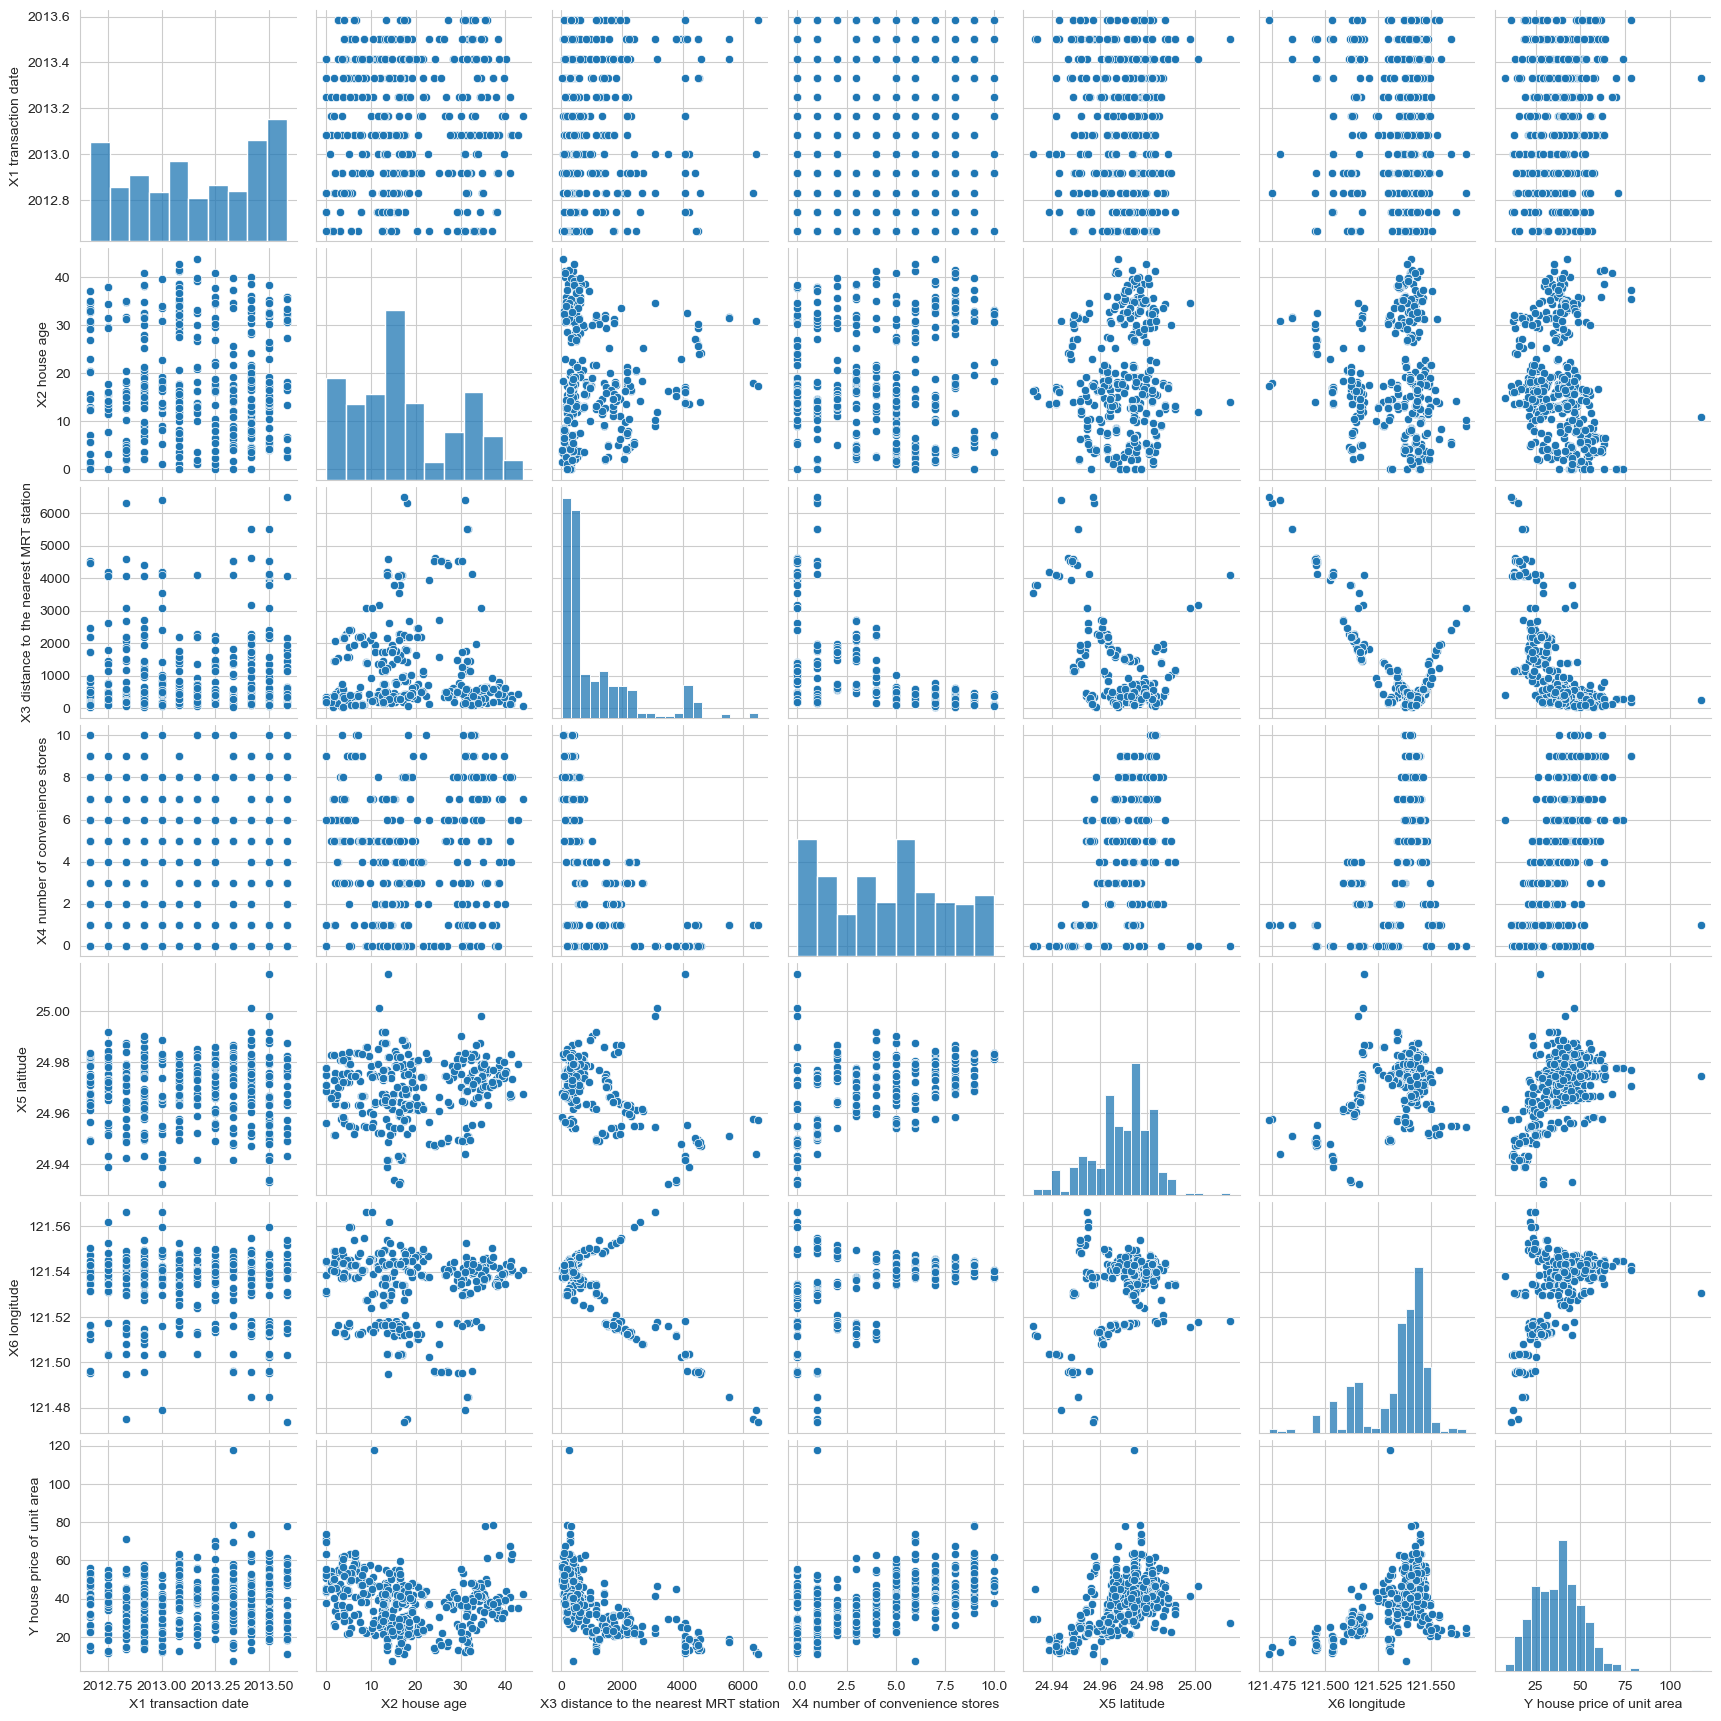

In [7]:
# Pair Plot using seaborn
sns.pairplot(df[numeric_columns])
plt.show()

### Correlation Matrix
We examine the correlation matrix to see which features are strongly correlated with each other and with the target (Y).

In [ ]:
# TODO: Import necessary libraries


# TODO: Ensure df is your DataFrame and numeric_cols contains numeric column names (including "Y house price of unit area")


# TODO: Compute the covariance matrix manually and visualize it


# TODO: Show the strongest correlations with "Y house price of unit area"
y_col = "Y house price of unit area"
if y_col in numeric_cols:
    # TODO: Sort correlations in descending order and print the strongest ones
else:
    print(f"Column '{y_col}' not found in numeric_cols.")


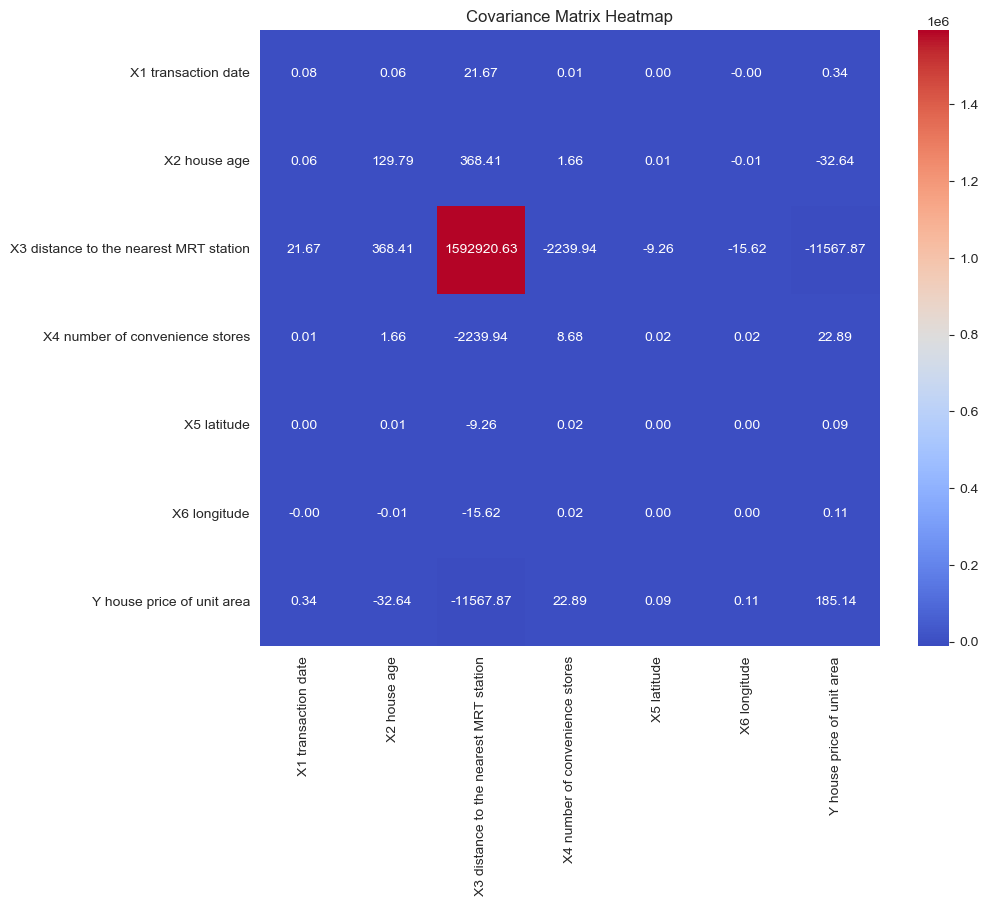

Strongest correlations with 'Y house price of unit area':

X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64


In [8]:
# TODO: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: Ensure df is your DataFrame and numeric_columns contains numeric column names (including "Y house price of unit area")
# For demonstration purposes, here's how you might define them if not already defined:
# df = pd.read_csv("your_data.csv")
# numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Subset to only numeric columns
df_numeric = df[numeric_columns]

# TODO: Compute the covariance matrix manually and visualize it
cov_matrix = df_numeric.cov()

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Covariance Matrix Heatmap")
plt.show()

# TODO: Show the strongest correlations with "Y house price of unit area"
y_col = "Y house price of unit area"
if y_col in numeric_columns:
    corr_matrix = df_numeric.corr()
    y_corr = corr_matrix[y_col].drop(y_col)  # Drop self-correlation
    y_corr_sorted = y_corr.sort_values(ascending=False)
    print("Strongest correlations with 'Y house price of unit area':\n")
    print(y_corr_sorted)
else:
    print(f"Column '{y_col}' not found in numeric_columns.")


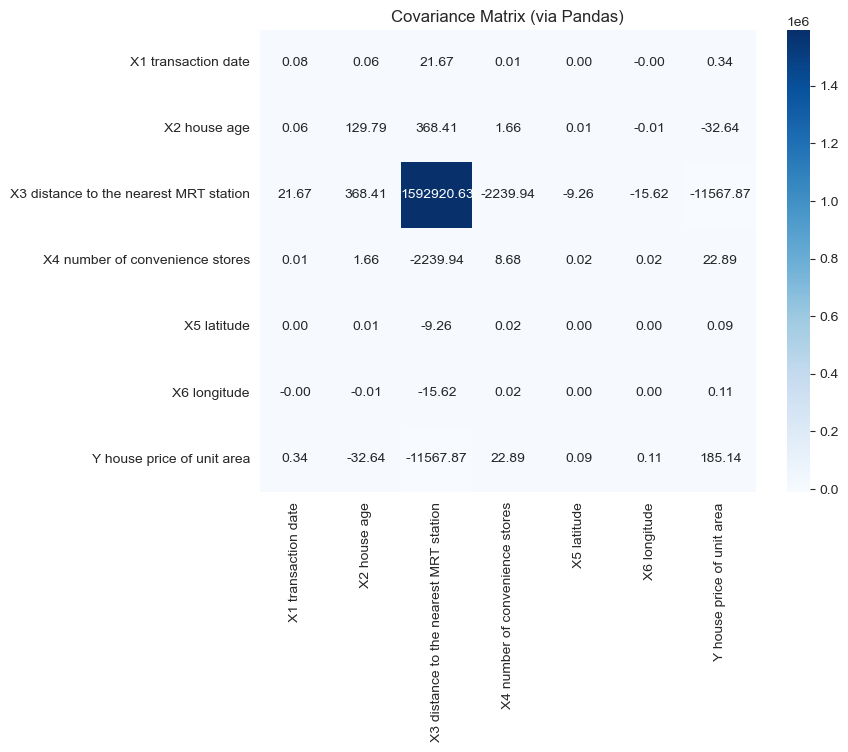

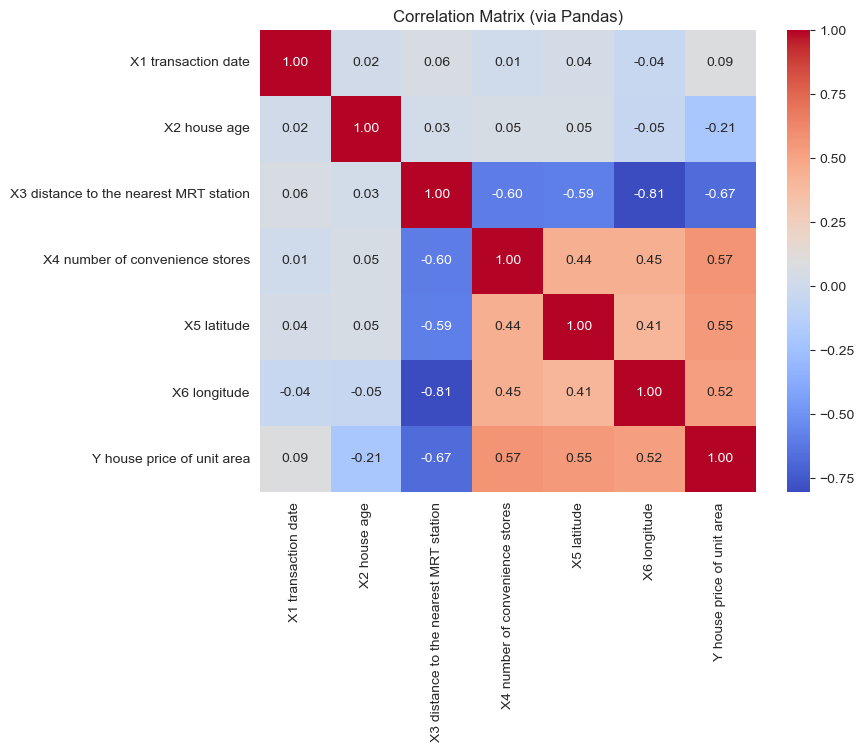

Strongest correlations with 'Y house price of unit area':
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose your numeric columns are in numeric_columns (including "Y house price of unit area").
# Ensure df is your DataFrame.

# 1) Extract the numeric data as a NumPy array
X = df[numeric_columns].values  # shape: (n_samples, n_features)

# 2) Compute the covariance matrix using pandas for comparison (alternative to manual approach)
cov_matrix_df = df[numeric_columns].cov()
cov_matrix = cov_matrix_df.values  # Convert to NumPy array

# 3) Visualize the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix_df, annot=True, cmap="Blues", fmt=".2f", xticklabels=numeric_columns, yticklabels=numeric_columns)
plt.title("Covariance Matrix (via Pandas)")
plt.show()

# 4) Compute the correlation matrix using pandas (alternative to manual correlation)
corr_matrix_df = df[numeric_columns].corr()
corr_matrix = corr_matrix_df.values  # Convert to NumPy array

# 5) Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_df, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=numeric_columns, yticklabels=numeric_columns)
plt.title("Correlation Matrix (via Pandas)")
plt.show()

# 6) Show the strongest correlations with "Y house price of unit area"
y_col = "Y house price of unit area"
if y_col in numeric_columns:
    corr_with_y = corr_matrix_df[y_col].drop(y_col).sort_values(ascending=False)
    print("Strongest correlations with 'Y house price of unit area':")
    print(corr_with_y)
else:
    print(f"Column '{y_col}' not found in numeric_columns.")


### Variance Inflation Factor (VIF)
To quantify multicollinearity, we can compute the **VIF** for each predictor. A high VIF (>10) suggests strong multicollinearity.

In [ ]:
# TODO: Import necessary library for VIF calculation


# TODO: Define the function calculate_vif
def calculate_vif(dataframe, features):
    """Calculate VIF for each feature in a pandas DataFrame."""
    

    return vif_scores

# TODO: Define the list of features to check for VIF (excluding 'Y house price of unit area')


# TODO: Call the function and print the VIF scores


# **B)**

## Multicollinearity Analysis & Successive Orthogonalization <a id="orthogonal"></a>

### Gram–Schmidt Process
We apply the Gram–Schmidt process to create an **orthogonal** set of predictors from the (potentially) correlated set. This can help in stabilizing coefficient estimates and clarifying the effect of each variable.

For details on the Gram–Schmidt process, see: [Wikipedia: Gram–Schmidt Process](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process).

In [ ]:
# TODO: Import necessary libraries


# TODO: Define the Gram-Schmidt orthogonalization function
def gram_schmidt(X):
    """
    Perform Gram-Schmidt orthogonalization on columns of X.
    Returns Q (orthogonal) and R (upper triangular).
    """


    return Q, R

# TODO: Convert X_scaled to a NumPy array


# TODO: Apply Gram-Schmidt to X_np


# TODO: Print the shapes of Q and R


# TODO: Compute and compare correlation matrices for original and orthogonalized features


# TODO: Print the max correlation (off-diagonal) for original and orthogonalized sets


# **C)**

## Train-Validation-Test Split, Model Building, and Performance Metrics <a id="split"></a>

We will do a 60–20–20 split: 60% for training, 20% for validation, and 20% for testing. The validation set is used to tune model complexity (e.g., polynomial degree).

In [ ]:
# TODO: Import necessary library for data splitting


# 1) TODO: Split data into train+validation and test sets


# 2) TODO: Split train+validation into train and validation sets


# TODO: Print the shapes of the training, validation, and test sets




We illustrate how model complexity changes by fitting **polynomial regression** models of increasing degree. For each degree \(d\):
1. Transform features \(X\) to polynomial features of degree \(d\).
2. Fit a linear model on the training set.
3. Evaluate on training, validation, and test sets.
4. Compare performance metrics to see if we overfit or underfit.

### Polynomial Features with Cross Terms
We use `PolynomialFeatures(degree=d, include_bias=False)` to include cross terms. That is, for degree 2, we get terms like \(X_1^2, X_1X_2, X_2^2, ...\) etc.

In [ ]:
# TODO: Import necessary libraries


# TODO: Define the function to build and evaluate a polynomial regression model
def build_and_eval_poly_model(X_tr, y_tr, X_v, y_v, X_te, y_te, degree):
    """
    Build polynomial regression of given degree, fit on (X_tr, y_tr),
    return predictions on train/val/test.
    """

    return model, y_tr_pred, y_v_pred, y_te_pred

# TODO: Define the degrees of polynomial features to test


# TODO: Train models for each polynomial degree and store the results


# TODO: Print confirmation that each model has been trained



We define **MSE**, **RMSE**, **R²**, and the **F-statistic** by hand. Additionally, we discuss partial F-tests in a later section.

- **MSE**: $ \frac{1}{n} \sum (y_i - \hat{y}_i)^2 $
- **RMSE**: $ \sqrt{\text{MSE}} $
- **R²**: $ 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} $
- **F-Statistic**: $ F = \frac{\text{SSR}/p}{\text{SSE}/(n-p-1)} $, where SSR is the regression sum of squares and SSE is the error sum of squares.


In [ ]:
# TODO: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Set Seaborn style and figure size


# TODO: Define the mean squared error (MSE) function


# TODO: Define the root mean squared error (RMSE) function


# TODO: Define the R² score function


# TODO: Define the F-statistic function for overall regression significance


# TODO: Initialize a dictionary to store evaluation metrics


# TODO: Loop through trained polynomial models and compute metrics


# TODO: Print textual summary of results


# TODO: Convert the summary dictionary into a DataFrame for visualization


# TODO: Create subplots for visualizing MSE and R² across different polynomial degrees


# TODO: Adjust layout and show the plots


# TODO: Create and visualize an additional plot for the F-statistic


# **D)**

## Advanced Diagnostics <a id="diagnostics"></a>

### Cook’s Distance <a id="cook"></a>
Cook’s distance measures the influence of each data point on the fitted regression. Points with large Cook’s distance may be outliers or high-leverage points.


In [ ]:
# TODO: Import necessary libraries

def cooks_distance(X, y, y_pred, model):
    """
    Calculate Cook's distance for each observation.
    X: design matrix (already polynomial-transformed if needed), shape (n, p)
    y: true labels, shape (n, )
    y_pred: predicted labels, shape (n, )
    model: fitted LinearRegression (with intercept)
    """

    return cooks_d

# TODO: Choose the best model on the validation set based on Val MSE


# TODO: Refit the best model on the training set


# TODO: Compute Cook's distance for the training set


# TODO: Plot Cook's distance


# TODO: Compute threshold for influential points


# TODO: Identify and print influential points


### Normality of Residuals (Shapiro–Wilk & Q–Q Plot) <a id="normality"></a>
A key assumption in ordinary least squares regression is that residuals are normally distributed. We can test this assumption using **Shapiro–Wilk** and visually check with a Q–Q plot.

In [ ]:
# TODO: Import necessary libraries

# TODO: Compute residuals for the best model


# TODO: Perform the Shapiro–Wilk test on the residuals


# TODO: Print the test statistic and p-value


# TODO: Interpret the p-value and print the conclusion


# TODO: Create a Q–Q plot of residuals


### Partial F-Tests for Model Comparison <a id="partialftest"></a>
A **partial F-test** compares a simpler (nested) model with a more complex model. We can see if the extra terms in the complex model significantly improve the fit.

For polynomial degrees, model with degree \(d\) is nested in model with degree \(d+1\) if we keep the same features. We can do a partial F-test by comparing SSE of these models.

In [ ]:
# TODO: Import necessary libraries


def partial_f_test(y_true, y_pred_reduced, y_pred_full, df_reduced, df_full):
    """
    Compare a reduced model vs. a full model via partial F-test.
    df_reduced: degrees of freedom of reduced model (n - p_reduced - 1)
    df_full: degrees of freedom of full model (n - p_full - 1)
    """

    return F_val


for i in range(len(degrees) - 1):
    d1 = degrees[i]
    d2 = degrees[i+1]
    print(f"Comparing degree {d1} vs degree {d2} on the training set:")

    # TODO: Extract predictions for models with degrees d1 and d2
    

    # TODO: Compute degrees of freedom for both models
    

    # TODO: Compute F-value using partial_f_test function
    

    # TODO: Print the F-value and discuss how to interpret it
    



# **E)**

## Discussion of Theoretical Concepts <a id="discussion"></a>

1. **Cochran’s Theorem & Variance of Noise**
   - Cochran’s theorem explains how we can decompose ________ into explained (SSR) and unexplained (SSE) parts.
   - The variance of noise is estimated by $\sigma^2 = \frac{SSE}{n-p-1}\ $, which is important for ________.

2. **Collinearity & Orthogonalization**
   - Collinearity among predictors can lead to ________.
   - One method to transform correlated predictors into an orthogonal set is ________.

3. **F-Statistic (ANOVA) & Partial F-Tests**
   - The overall F-test is used to check if ________.
   - Partial F-tests compare ________, helping us determine ________.

4. **Normality of Residuals**
   - A key assumption in OLS regression is that residuals are ________.
   - Two common methods to check this assumption are ________ and ________.

5. **Cook’s Distance**
   - Cook’s distance helps identify ________.
   - A common threshold for determining influential points is ________.


# **F)**

In [7]:
# TODO



### **Further Reading**
- [Cochran’s Theorem (Wikipedia)](https://en.wikipedia.org/wiki/Cochran%27s_theorem)
- [ANOVA and F-tests (Wikipedia)](https://en.wikipedia.org/wiki/F-test)
- [Cook’s Distance (Reference)](https://en.wikipedia.org/wiki/Cook%27s_distance)
- [Shapiro–Wilk Test (Reference)](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)